In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 9.1 Maximal Margin Classifier

**9.1.1 What Is a Hyperplane?**

**FIGURE 9.1**

In [3]:
from matplotlib.colors import ListedColormap
color_list =  ['red','blue','green','black','yellow','brown','peru']
cmap = ListedColormap(color_list[:2])

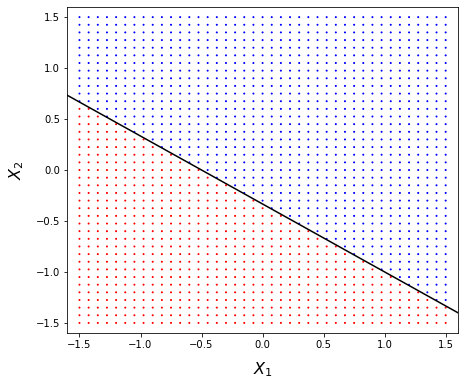

In [4]:
plt.figure(figsize=(7, 6))
XX, YY = np.meshgrid(np.arange(-1.5, 1.525, 0.075), np.arange(-1.5, 1.525, 0.075))
z = (1 + 2 * XX.ravel() + 3 * YY.ravel() > 0)
X = np.arange(-2, 3)
y = -2/3 * X - 1/3
plt.scatter(XX.flatten(),YY.flatten(),marker = 'o',s=1,c = z,cmap=cmap)
plt.plot(X,y,'k-')
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.show()

**9.1.2 Classification Using a Separating Hyperplane**

**FIGURE 9.2.**

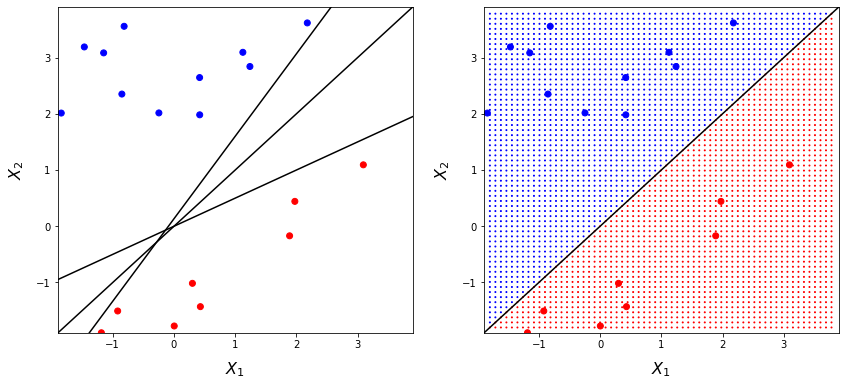

In [5]:
np.random.seed(1)
b = 3.8
a = -2
X = np.arange(-3, 4)
X1 = (b - a) * np.random.random_sample(20) + a
X2 = (b - a) * np.random.random_sample(20) + a
y = (X1 - X2 < 0)
XX, YY = np.meshgrid(np.arange(-1.8, 3.8, 0.09), np.arange(-1.8, 3.8, 0.09))
z = ( XX.ravel() - YY.ravel() < 0)

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(X1,X2,c = y,cmap=cmap)
plt.xlim([-1.9,3.9])
plt.ylim([-1.9,3.9])
plt.plot([-4,4],[-4,4],'k-')
plt.plot([-2,4],[-1,2],'k-')
plt.plot([-2,4],[-2.8,6],'k-')
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)

plt.subplot(1,2,2)
plt.scatter(X1,X2,c = y,cmap=cmap)
plt.xlim([-1.9,3.9])
plt.ylim([-1.9,3.9])
plt.plot([-4,4],[-4,4],'k-')
plt.scatter(XX.flatten(),YY.flatten(),marker = 'o',s=1,c = z,cmap=cmap)
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.show()

**9.1.3 The Maximal Margin Classifier**

**FIGURE 9.3.**

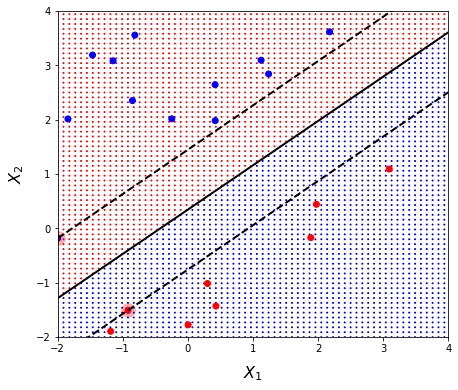

In [6]:
from sklearn.svm import SVC

plt.figure(figsize=(7, 6))
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
X = np.c_[X1,X2]
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(-2, 4, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
XX, YY = np.meshgrid(np.arange(-2, 4, 0.09), np.arange(-2, 4, 0.09))
z = (w[0] * XX.ravel() + w[1] * YY.ravel() + b < 0)
plt.scatter(XX.flatten(),YY.flatten(),marker = 'o',s=1,c = z,cmap=cmap)
plt.scatter(X1,X2,c = y,cmap=cmap)
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.show()

**9.3.3 心脏数据的应用**

In [7]:
Heart = pd.read_csv("data/Heart.csv").drop('Unnamed: 0', axis=1).dropna()
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
from sklearn.model_selection import train_test_split
columns = '1'
for column in Heart.columns:
    columns = columns + '+' + column
y,X = patsy.dmatrices('AHD ~ {} - AHD'.format(columns),Heart, return_type = 'dataframe')
X_train, X_test = train_test_split(X, test_size=90, random_state=1983)
y_train, y_test = train_test_split(y, test_size=90, random_state=1983)
X_train.drop('Intercept',axis = 1,inplace= True)
X_test.drop('Intercept',axis = 1,inplace= True)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train['AHD[Yes]'])
y_train_lda_scores = lda.decision_function(X_train)
y_test_lda_scores = lda.decision_function(X_test)

svc_lcf = SVC(kernel="linear", C = 10)
svc_lcf.fit(X_train, y_train['AHD[Yes]'])
y_train_lcf_scores = svc_lcf.decision_function(X_train)
y_test_lcf_scores = svc_lcf.decision_function(X_test)


svm_list = []
train_scores_list = []
test_scores_list = []
ganmma_range = [0.001,0.01,0.1]
for index_num in range(len(ganmma_range)):
    svm_list.append(SVC(kernel="rbf", C = 10,gamma = ganmma_range[index_num]))
    svm_list[index_num].fit(X_train,y_train['AHD[Yes]'])
    train_scores_list.append(svm_list[index_num].decision_function(X_train))
    test_scores_list.append(svm_list[index_num].decision_function(X_test))

**FIGURE 9.10**

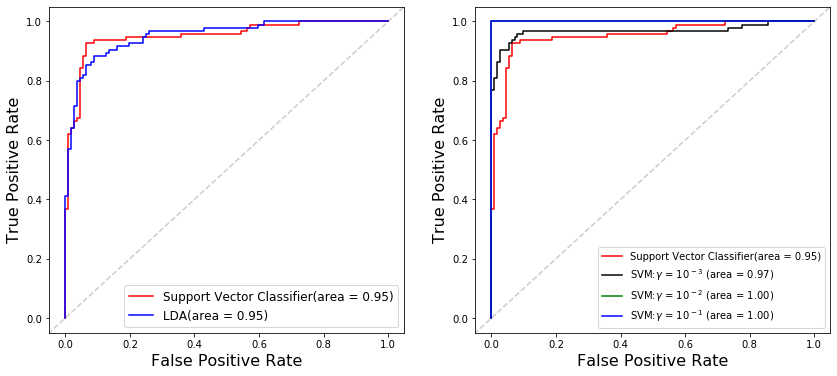

In [10]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure(figsize=(14, 6))
plt.subplot(121)
fpr_train_lda, tpr_train_lda, _ = roc_curve(y_train['AHD[Yes]'], y_train_lda_scores)
fpr_train_lcf, tpr_train_lcf, _= roc_curve(y_train['AHD[Yes]'], y_train_lcf_scores)

roc_auc_train_lda = roc_auc_score(y_train['AHD[Yes]'], y_train_lda_scores)
roc_auc_train_lcf = roc_auc_score(y_train['AHD[Yes]'], y_train_lcf_scores)

plt.plot(fpr_train_lcf, tpr_train_lcf,'r-', label='Support Vector Classifier(area = %0.2f)' % roc_auc_train_lcf)
plt.plot(fpr_train_lda, tpr_train_lda,'b-', label='LDA(area = %0.2f)' % roc_auc_train_lda )
plt.plot([-1, 2], [-1, 2], 'k--',alpha = 0.2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.legend(loc="lower right",fontsize = 12)

plt.subplot(122)
plt.plot(fpr_train_lcf, tpr_train_lcf,'r-', label='Support Vector Classifier(area = %0.2f)' % roc_auc_train_lcf)

style_pool = ['k-','g-','b-']
ganmma_pool = [3,2,1]
for index_num in range(len(ganmma_range)):
    fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train['AHD[Yes]'], train_scores_list[index_num])
    roc_auc_train_svm = roc_auc_score(y_train['AHD[Yes]'], train_scores_list[index_num])
    plt.plot(fpr_train_svm, tpr_train_svm,style_pool[index_num],
             label='SVM:$\gamma$ = 10$^-$$^%s$ (area = %0.2f)' % (ganmma_pool[index_num],roc_auc_train_svm))
plt.plot([-1, 2], [-1, 2], 'k--',alpha = 0.2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.legend(loc="lower right",fontsize = 10)
plt.show()

**FIGURE 9.11.**

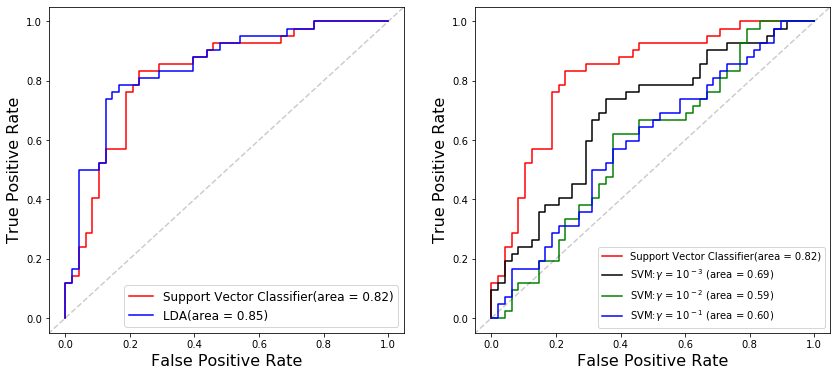

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
fpr_test_lda, tpr_test_lda, _ = roc_curve(y_test['AHD[Yes]'], y_test_lda_scores)
fpr_test_lcf, tpr_test_lcf, _= roc_curve(y_test['AHD[Yes]'], y_test_lcf_scores)

roc_auc_test_lda = roc_auc_score(y_test['AHD[Yes]'], y_test_lda_scores)
roc_auc_test_lcf = roc_auc_score(y_test['AHD[Yes]'], y_test_lcf_scores)

plt.plot(fpr_test_lcf, tpr_test_lcf,'r-', label='Support Vector Classifier(area = %0.2f)' % roc_auc_test_lcf)
plt.plot(fpr_test_lda, tpr_test_lda,'b-', label='LDA(area = %0.2f)' % roc_auc_test_lda )
plt.plot([-1, 2], [-1, 2], 'k--',alpha = 0.2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.legend(loc="lower right",fontsize = 12)

plt.subplot(122)
plt.plot(fpr_test_lcf, tpr_test_lcf,'r-', label='Support Vector Classifier(area = %0.2f)' % roc_auc_test_lcf)

style_pool = ['k-','g-','b-']
ganmma_pool = [3,2,1]
for index_num in range(len(ganmma_range)):
    fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test['AHD[Yes]'], test_scores_list[index_num])
    roc_auc_test_svm = roc_auc_score(y_test['AHD[Yes]'], test_scores_list[index_num])
    plt.plot(fpr_test_svm, tpr_test_svm,style_pool[index_num],
             label='SVM:$\gamma$ = 10$^-$$^%s$ (area = %0.2f)' % (ganmma_pool[index_num],roc_auc_test_svm))
plt.plot([-1, 2], [-1, 2], 'k--',alpha = 0.2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.legend(loc="lower right",fontsize = 10)
plt.show()